# 데이터 불러오기

In [27]:
#import csv
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일 경로(train / test)

file_path_train = '/content/drive/My Drive/end_hotel_bookings.csv'   # 전처리 끝낸 original 데이터
# file_path_train = '/content/drive/My Drive/SVD_Standard.csv'    # SVD_Standard 스케일링
# file_path_train = '/content/drive/My Drive/SVD_Minmax.csv'      # SVD_Minmax 스케일링


# train CSV 파일 읽기
df = pd.read_csv(file_path_train)

# 데이터 출력(잘 들어왔는지 확인)
df.head()  # 처음 다섯 줄 출력

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_2,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,deposit_type_0,deposit_type_1,customer_type_0,customer_type_1,A_C_exist
0,0,0,342,1,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,737,1,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,7,1,1,0,1,1,0.0,0,...,0,1,0,0,0,0,0,0,0,0.0
3,0,0,13,1,1,0,1,1,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5
4,0,0,14,1,1,0,2,2,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5


# Grid Search - end_hotel_booking

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델과 GridSearchCV 설정
model = LogisticRegression(max_iter=5000)
param_grid = {
    'C': [0.1, 1, 10, 100],     # C : 정규화 강도 제어하는 Hyperparameter
    # 값이 작을수록 강한 정규화 값이 클수록 약한 정규화
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # 최적화 알고리즘 지정
    # solver 값의 범위는 ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']로 설정
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 따른 모델
best_model = grid_search.best_estimator_

# 최적의 파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

# 최적 모델로 예측
y_pred = best_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))


Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.8065146303138404
Confusion Matrix:
[[13327  1401]
 [ 3155  5664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     14728
           1       0.80      0.64      0.71      8819

    accuracy                           0.81     23547
   macro avg       0.81      0.77      0.78     23547
weighted avg       0.81      0.81      0.80     23547

Model coefficients:
hotel                             0.036914
lead_time                         0.490220
arrival_date_year                 0.130464
arrival_date_day_of_month         0.011733
stays_in_weekend_nights           0.052167
stays_in_week_nights              0.111559
adults                            0.111879
children                          0.095616
babies                            0.025002
meal                             -0.043828
is_repeated_guest                -0.168852
previous_cancellations       

In [26]:
# 최적의 파라미터와 그에 따른 모델
best_model = grid_search.best_estimator_

# 최적의 파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'solver': 'liblinear'}


## Grid - end 학습 돌리기

Accuracy: 0.8065146303138404
Confusion Matrix:
[[13327  1401]
 [ 3155  5664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     14728
           1       0.80      0.64      0.71      8819

    accuracy                           0.81     23547
   macro avg       0.81      0.77      0.78     23547
weighted avg       0.81      0.81      0.80     23547

Model coefficients:
hotel                             0.036914
lead_time                         0.490220
arrival_date_year                 0.130464
arrival_date_day_of_month         0.011733
stays_in_weekend_nights           0.052167
stays_in_week_nights              0.111559
adults                            0.111879
children                          0.095616
babies                            0.025002
meal                             -0.043828
is_repeated_guest                -0.168852
previous_cancellations            2.048465
previous_bookings_not_canceled   -0.

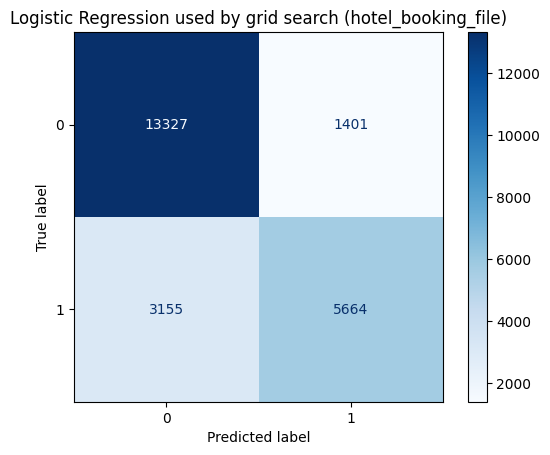

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 최적의 하이퍼파라미터로 로지스틱 회귀 모델 생성 및 학습
best_model = LogisticRegression(C=10, solver='liblinear', max_iter=5000)
best_model.fit(X_train_scaled, y_train)

# 예측
y_pred = best_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression used by grid search (hotel_booking_file)')
plt.show()

Train Accuracy: 0.8093433136911398
Test Accuracy: 0.8064296938038816
Train Precision: 0.8043811219946572
Test Precision: 0.8013010889548862
Train Recall: 0.6443448984250171
Test Recall: 0.6424764712552443
Train F1: 0.7155236601555692
Test F1: 0.7131529263687854


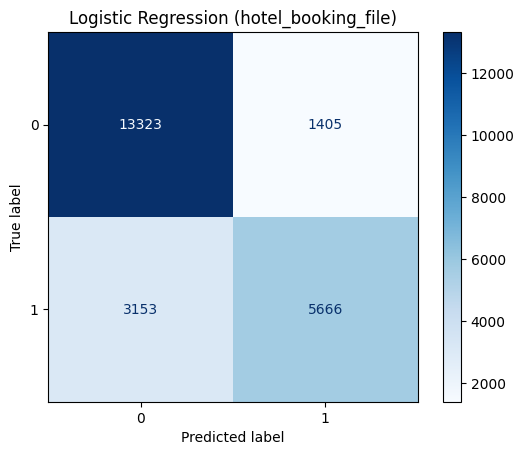

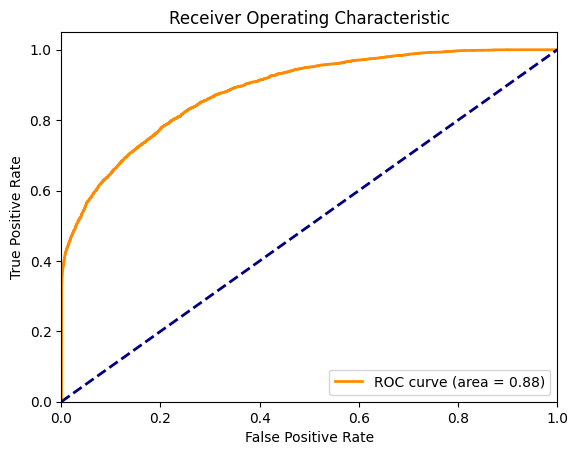

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 모델 평가
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# 결과 저장
score = {
    'train_accuracy': [accuracy_train],
    'test_accuracy': [accuracy_test],
    'train_precision': [precision_train],
    'test_precision': [precision_test],
    'train_recall': [recall_train],
    'test_recall': [recall_test],
    'train_f1': [f1_train],
    'test_f1': [f1_test]
}

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

# ROC Curve
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Grid Search - SVD_Standard

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델과 GridSearchCV 설정
model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.1, 1, 10, 100],     # C : 정규화 강도 제어하는 Hyperparameter
    # 값이 작을수록 강한 정규화 값이 클수록 약한 정규화
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # 최적화 알고리즘 지정
    # solver 값의 범위는 ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']로 설정
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 따른 모델
best_model = grid_search.best_estimator_

# 최적의 파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

# 최적 모델로 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))


Best parameters: {'C': 100, 'solver': 'newton-cg'}
Accuracy: 0.7834543678600246
Confusion Matrix:
[[13217  1511]
 [ 3588  5231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     14728
           1       0.78      0.59      0.67      8819

    accuracy                           0.78     23547
   macro avg       0.78      0.75      0.76     23547
weighted avg       0.78      0.78      0.78     23547

Model coefficients:
0    -0.433805
1    -1.077830
2     0.399425
3     0.572631
4     0.363064
5    -0.898704
6     0.087875
7     0.435505
8     0.908865
9     0.197551
10    0.139485
11   -0.230719
12   -0.132691
13    0.036006
14   -0.058546
15   -0.602599
16   -0.112569
17    0.380682
18    0.273781
19   -0.432046
20   -1.024400
21   -0.280540
22   -0.139778
23    0.618471
24   -0.415327
25   -0.221094
26    0.080959
27   -0.267838
28    0.374249
29   -0.145876
30   -0.466323
dtype: float64


## Grid - Standard 학습 돌리기

Accuracy: 0.7834543678600246
Confusion Matrix:
[[13217  1511]
 [ 3588  5231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     14728
           1       0.78      0.59      0.67      8819

    accuracy                           0.78     23547
   macro avg       0.78      0.75      0.76     23547
weighted avg       0.78      0.78      0.78     23547

Model coefficients:
0    -0.433805
1    -1.077830
2     0.399425
3     0.572631
4     0.363064
5    -0.898704
6     0.087875
7     0.435505
8     0.908865
9     0.197551
10    0.139485
11   -0.230719
12   -0.132691
13    0.036006
14   -0.058546
15   -0.602599
16   -0.112569
17    0.380682
18    0.273781
19   -0.432046
20   -1.024400
21   -0.280540
22   -0.139778
23    0.618471
24   -0.415327
25   -0.221094
26    0.080959
27   -0.267838
28    0.374249
29   -0.145876
30   -0.466323
dtype: float64


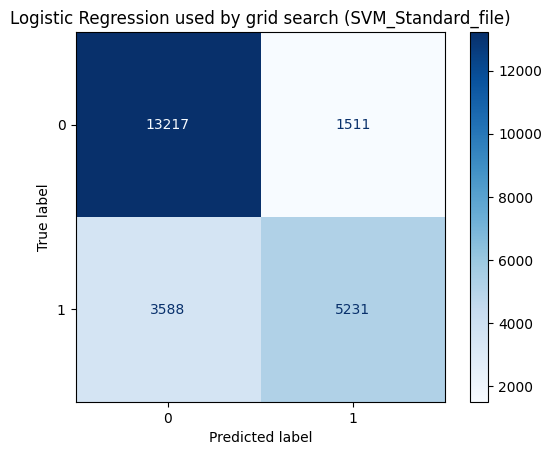

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 최적의 하이퍼파라미터로 로지스틱 회귀 모델 생성 및 학습
best_model = LogisticRegression(C=100, solver='newton-cg', max_iter=1000)
best_model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression used by grid search (SVM_Standard_file)')
plt.show()

Train Accuracy: 0.7852418113287678
Test Accuracy: 0.7834543678600246
Train Precision: 0.776150549655301
Test Precision: 0.7758825274399288
Train Recall: 0.594270714448756
Test Recall: 0.5931511509241411
Train F1: 0.6731412504241876
Test F1: 0.6723218302165671


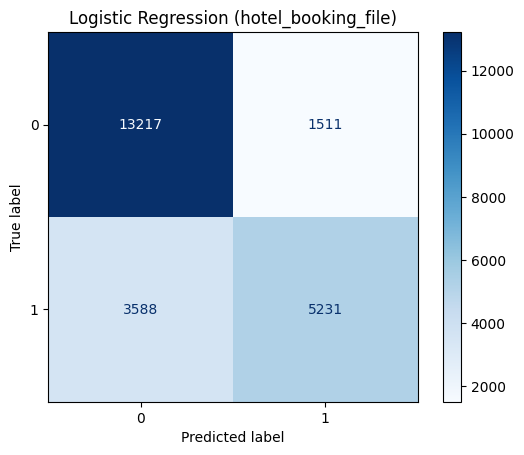

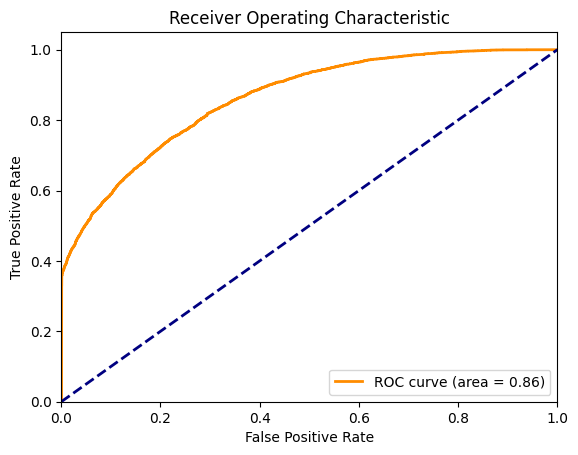

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(C=100, solver='newton-cg', max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 평가
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# 결과 저장
score = {
    'train_accuracy': [accuracy_train],
    'test_accuracy': [accuracy_test],
    'train_precision': [precision_train],
    'test_precision': [precision_test],
    'train_recall': [recall_train],
    'test_recall': [recall_test],
    'train_f1': [f1_train],
    'test_f1': [f1_test]
}

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

# ROC Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Grid - SVD_MinMax

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델과 GridSearchCV 설정
model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.1, 1, 10, 100],     # C : 정규화 강도 제어하는 Hyperparameter
    # 값이 작을수록 강한 정규화 값이 클수록 약한 정규화
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # 최적화 알고리즘 지정
    # solver 값의 범위는 ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']로 설정
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 따른 모델
best_model = grid_search.best_estimator_

# 최적의 파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

# 최적 모델로 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))


Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.7534293115895868
Confusion Matrix:
[[13066  1662]
 [ 4144  4675]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     14728
           1       0.74      0.53      0.62      8819

    accuracy                           0.75     23547
   macro avg       0.75      0.71      0.72     23547
weighted avg       0.75      0.75      0.74     23547

Model coefficients:
0     1.289414
1     0.951186
2    -0.782103
3    -1.023283
4    -1.422804
5    -0.058179
6     0.244424
7    -1.713114
8    -0.710103
9     0.572463
10   -0.305983
11    1.452068
12   -1.021812
13   -0.987626
14   -0.603788
15   -0.813526
16   -0.678132
dtype: float64


## Grid - MinMax 학습 돌리기

Accuracy: 0.7534293115895868
Confusion Matrix:
[[13066  1662]
 [ 4144  4675]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     14728
           1       0.74      0.53      0.62      8819

    accuracy                           0.75     23547
   macro avg       0.75      0.71      0.72     23547
weighted avg       0.75      0.75      0.74     23547

Model coefficients:
0     1.289414
1     0.951186
2    -0.782103
3    -1.023283
4    -1.422804
5    -0.058179
6     0.244424
7    -1.713114
8    -0.710103
9     0.572463
10   -0.305983
11    1.452068
12   -1.021812
13   -0.987626
14   -0.603788
15   -0.813526
16   -0.678132
dtype: float64


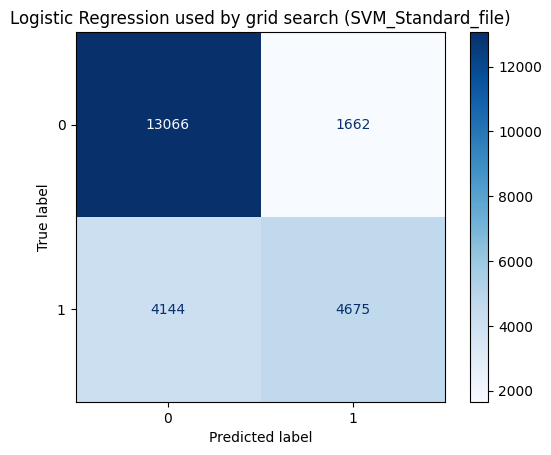

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 최적의 하이퍼파라미터로 로지스틱 회귀 모델 생성 및 학습
best_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)
best_model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression used by grid search (SVM_Standard_file)')
plt.show()

Train Accuracy: 0.7481446090141742
Test Accuracy: 0.7535142480995456
Train Precision: 0.724501526142625
Test Precision: 0.7385662288336762
Train Recall: 0.5214848208171651
Test Recall: 0.5291983218051933
Train F1: 0.6064537536291996
Test F1: 0.6165940018496499


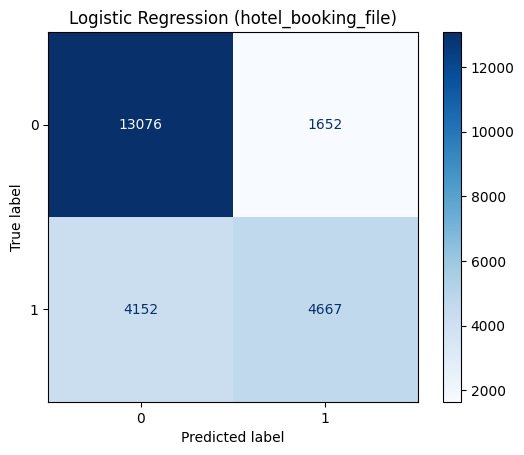

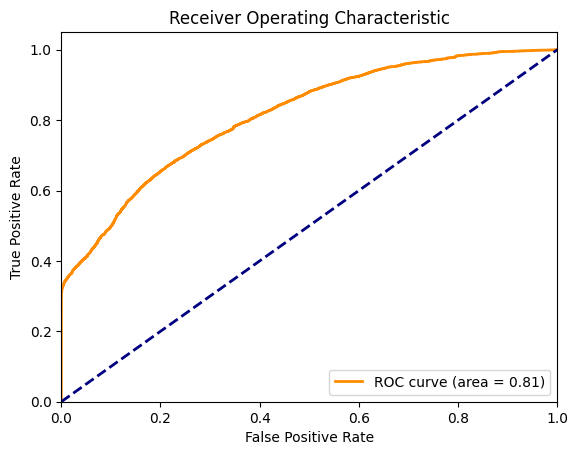

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(C=100, solver='newton-cg', max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 평가
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# 결과 저장
score = {
    'train_accuracy': [accuracy_train],
    'test_accuracy': [accuracy_test],
    'train_precision': [precision_train],
    'test_precision': [precision_test],
    'train_recall': [recall_train],
    'test_recall': [recall_test],
    'train_f1': [f1_train],
    'test_f1': [f1_test]
}

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

# ROC Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# 선형회귀

## Logistic Regression - end_hotel_booking

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8056652652142523
Confusion Matrix:
[[13318  1410]
 [ 3166  5653]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     14728
           1       0.80      0.64      0.71      8819

    accuracy                           0.81     23547
   macro avg       0.80      0.77      0.78     23547
weighted avg       0.81      0.81      0.80     23547

Model coefficients:
hotel                             0.078934
lead_time                         0.004688
arrival_date_year                 0.160288
arrival_date_day_of_month         0.001069
stays_in_weekend_nights           0.055779
stays_in_week_nights              0.057158
adults                            0.166452
children                          0.217543
babies                            0.181107
meal                             -0.105380
is_repeated_guest                -0.973726
previous_cancellations            2.349582
previous_bookings_not_canceled   -0.

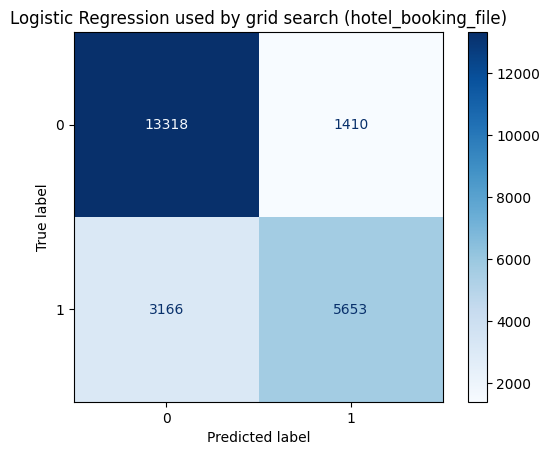

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(model.coef_[0], index=X.columns))


# 0이 취소x / 1이 취소o

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

Train Accuracy: 0.8093433136911398
Test Accuracy: 0.8064296938038816
Train Precision: 0.8043811219946572
Test Precision: 0.8013010889548862
Train Recall: 0.6443448984250171
Test Recall: 0.6424764712552443
Train F1: 0.7155236601555692
Test F1: 0.7131529263687854


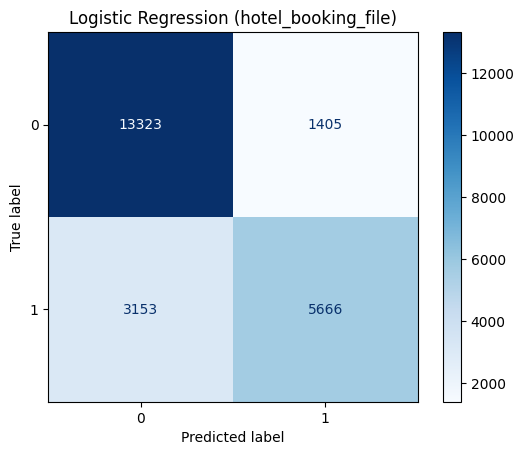

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# 데이터 로드 (실제 데이터프레임 df를 사용해야 합니다)
# df = pd.read_csv('your_data.csv')

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 모델 평가
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# 결과 저장
score = {
    'train_accuracy': [accuracy_train],
    'test_accuracy': [accuracy_test],
    'train_precision': [precision_train],
    'test_precision': [precision_test],
    'train_recall': [recall_train],
    'test_recall': [recall_test],
    'train_f1': [f1_train],
    'test_f1': [f1_test]
}

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

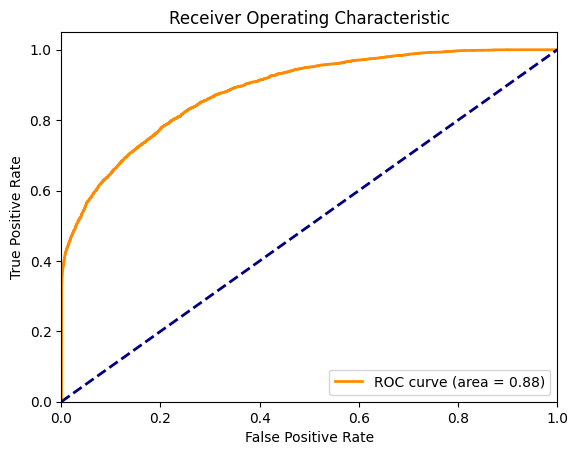

In [18]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

# ROC Curve
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression - SVD_Standard

Accuracy: 0.7834543678600246
Confusion Matrix:
[[13217  1511]
 [ 3588  5231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     14728
           1       0.78      0.59      0.67      8819

    accuracy                           0.78     23547
   macro avg       0.78      0.75      0.76     23547
weighted avg       0.78      0.78      0.78     23547

Model coefficients:
0    -0.433805
1    -1.077830
2     0.399425
3     0.572631
4     0.363064
5    -0.898704
6     0.087875
7     0.435505
8     0.908865
9     0.197551
10    0.139485
11   -0.230719
12   -0.132691
13    0.036006
14   -0.058546
15   -0.602599
16   -0.112569
17    0.380682
18    0.273781
19   -0.432046
20   -1.024400
21   -0.280540
22   -0.139778
23    0.618471
24   -0.415327
25   -0.221094
26    0.080959
27   -0.267838
28    0.374249
29   -0.145876
30   -0.466323
dtype: float64


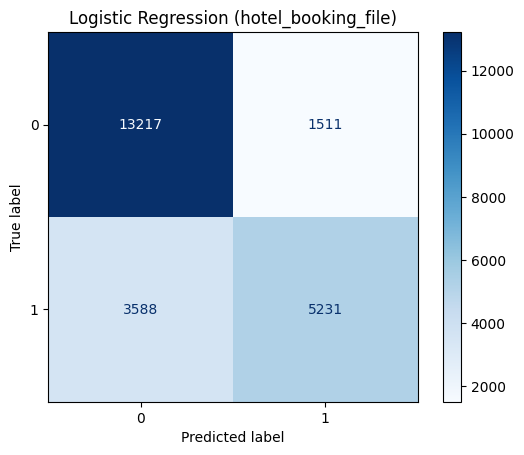

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

Train Accuracy: 0.7851993417210809
Test Accuracy: 0.7834543678600246
Train Precision: 0.7761171778912452
Test Precision: 0.7759643916913946
Train Recall: 0.5941565852545081
Test Recall: 0.5930377593831501
Train F1: 0.673055479241746
Test F1: 0.672279709492898


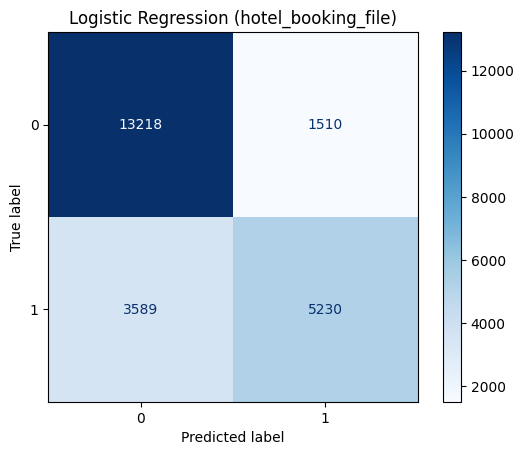

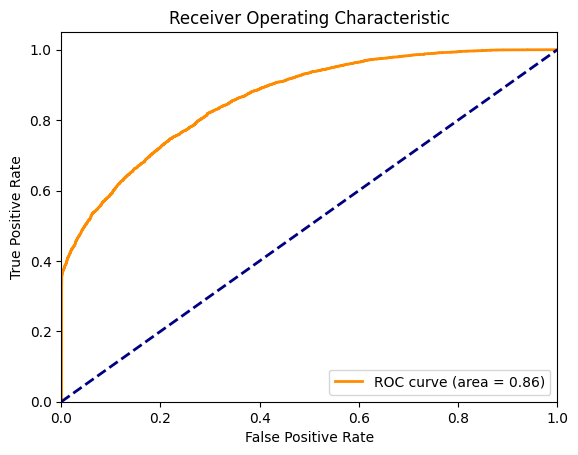

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 평가
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# 결과 저장
score = {
    'train_accuracy': [accuracy_train],
    'test_accuracy': [accuracy_test],
    'train_precision': [precision_train],
    'test_precision': [precision_test],
    'train_recall': [recall_train],
    'test_recall': [recall_test],
    'train_f1': [f1_train],
    'test_f1': [f1_test]
}

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

# ROC Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression - SVD_MinMax





In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 모델의 회귀 계수 확인
print("Model coefficients:")
print(pd.Series(best_model.coef_[0], index=X.columns))

Accuracy: 0.7534293115895868
Confusion Matrix:
[[13066  1662]
 [ 4144  4675]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     14728
           1       0.74      0.53      0.62      8819

    accuracy                           0.75     23547
   macro avg       0.75      0.71      0.72     23547
weighted avg       0.75      0.75      0.74     23547

Model coefficients:
0     1.289414
1     0.951186
2    -0.782103
3    -1.023283
4    -1.422804
5    -0.058179
6     0.244424
7    -1.713114
8    -0.710103
9     0.572463
10   -0.305983
11    1.452068
12   -1.021812
13   -0.987626
14   -0.603788
15   -0.813526
16   -0.678132
dtype: float64


Train Accuracy: 0.7481870786218612
Test Accuracy: 0.7534293115895868
Train Precision: 0.7246342333769478
Test Precision: 0.7385589865399842
Train Recall: 0.521456288518603
Test Recall: 0.5288581471822202
Train F1: 0.6064809437687699
Test F1: 0.6163605127527422


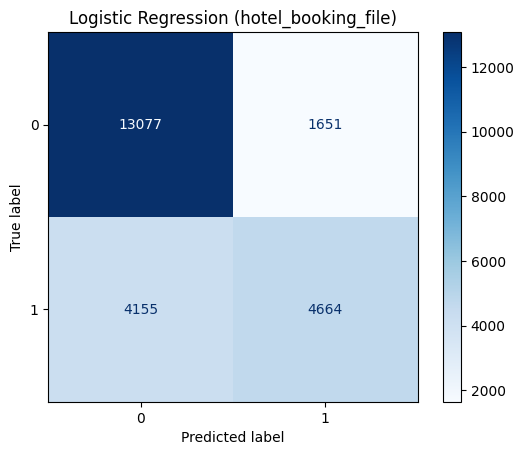

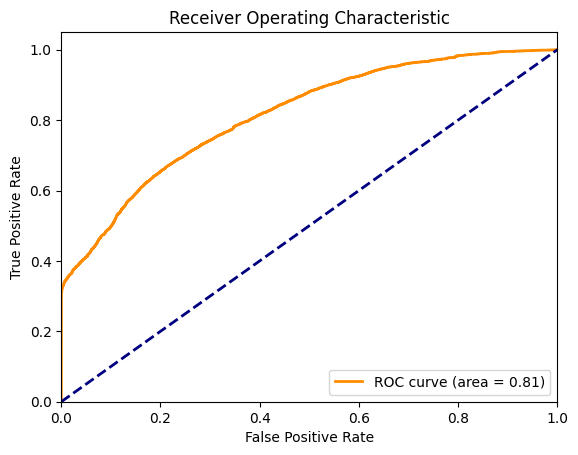

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

# 예측에 사용될 특징과 목표 변수 설정
X = df.drop(['is_canceled'], axis=1)  # 특징 (특성)
y = df['is_canceled']  # 목표 변수 (레이블)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 평가
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# 결과 저장
score = {
    'train_accuracy': [accuracy_train],
    'test_accuracy': [accuracy_test],
    'train_precision': [precision_train],
    'test_precision': [precision_test],
    'train_recall': [recall_train],
    'test_recall': [recall_test],
    'train_f1': [f1_train],
    'test_f1': [f1_test]
}

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression (hotel_booking_file)')
plt.show()

# ROC Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()